## Imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

In [25]:
def median_scinot_corrections(median, parname):
    '''
    Multiplies parameters in the EXOFASTv2 median table by the scientific notation exponent.

    median: pandas DataFrame for median table
    param: input parameter name
    '''

    scinot = median.scinot[median.parname==parname].iloc[0]

    if type(scinot) == str:
        exp_search = re.findall(r'\\times 10\^{(.*)}', scinot)
        exponent = int(exp_search[0])
    else:
        exponent = 0

    param = median.median_value[median.parname==parname].iloc[0]
    param_corrected = param * 10**exponent

    uperr = median.upper_errorbar[median.parname==parname].iloc[0]
    uperr_corrected = uperr * 10**exponent

    lowerr = median.lower_errorbar[median.parname==parname].iloc[0]
    lowerr_corrected = lowerr * 10**exponent
    return param_corrected, uperr_corrected, lowerr_corrected

def grab_exofastdata(target_names, prefix_list, path):
    '''
    target_names: a list of strings containing the name of each target. Ex: ['TOI-1855', 'TOI-2107']
    prefix_list: a list of strings containing the EXOFASTv2 output prefix for each target. Should have the same length as target_names. Ex: ['4711', 'TOI-2107.MIST.SED']
    path: the filepath to the directory containing the EXOFASTv2 outputs. Ex: '/Users/jack/Research/pipelines/system_figure_pipeline/data'
    '''

    data = pd.DataFrame()
    data['Name'] = target_names

    data['teff'] = np.zeros_like(target_names)
    data['teff_errhigh'] = np.zeros_like(target_names)
    data['teff_errlow'] = np.zeros_like(target_names)
    data['a_au'] = np.zeros_like(target_names)
    data['a_errhigh'] = np.zeros_like(target_names)
    data['a_errlow'] = np.zeros_like(target_names)
    data['ecc'] = np.zeros_like(target_names)
    data['ecc_errhigh'] = np.zeros_like(target_names)
    data['ecc_errlow'] = np.zeros_like(target_names)
    data['period'] = np.zeros_like(target_names)
    data['period_errhigh'] = np.zeros_like(target_names)
    data['period_errlow'] = np.zeros_like(target_names)
    data['mass'] = np.zeros_like(target_names)
    data['mass_errhigh'] = np.zeros_like(target_names)
    data['mass_errlow'] = np.zeros_like(target_names)
    data['radius'] = np.zeros_like(target_names)
    data['radius_errhigh'] = np.zeros_like(target_names)
    data['radius_errlow'] = np.zeros_like(target_names)

    pd.set_option('mode.chained_assignment', None) # to quiet the warning that I'm setting values in data with copies of values from median

    i = 0

    median_names = ['parname', 'median_value', 'upper_errorbar', 'lower_errorbar', 'scinot']

    for prefix in prefix_list:
        median = pd.read_csv(f'{path}/{prefix}.median.csv', skiprows=1, header=None, names=median_names)

        data['teff'][i], data['teff_errhigh'][i], data['teff_errlow'][i] = median_scinot_corrections(median, 'teff_0')
        data['a_au'][i] = median_scinot_corrections(median, 'a_0')[0]
        data['a_errhigh'][i] = median_scinot_corrections(median, 'a_0')[1]
        data['a_errlow'][i] = median_scinot_corrections(median, 'a_0')[2]
        data['ecc'][i] = median_scinot_corrections(median, 'e_0')[0]
        data['ecc_errhigh'][i] = median_scinot_corrections(median, 'e_0')[1]
        data['ecc_errlow'][i] = median_scinot_corrections(median, 'e_0')[2]
        data['period'][i] = median_scinot_corrections(median, 'Period_0')[0]
        data['period_errhigh'][i] = median_scinot_corrections(median, 'Period_0')[1]
        data['period_errlow'][i] = median_scinot_corrections(median, 'Period_0')[2]
        data['mass'][i] = median_scinot_corrections(median, 'mp_0')[0]
        data['mass_errhigh'][i] = median_scinot_corrections(median, 'mp_0')[1]
        data['mass_errlow'][i] = median_scinot_corrections(median, 'mp_0')[2]
        data['radius'][i] = median_scinot_corrections(median, 'rp_0')[0]
        data['radius_errhigh'][i] = median_scinot_corrections(median, 'rp_0')[1]
        data['radius_errlow'][i] = median_scinot_corrections(median, 'rp_0')[2]
        i+=1
    
    return data
    

## Loading in data

In [26]:
# TESS giant planets with measured eccentricities, excluding limits
archive_data_tess = pd.read_csv('PS_2024.07.03_12.09.15.csv', header=105)
# confirmed hot and warm jupiters with measured radii, excluding targets with eccentricity limits
# default parameter set = 1; controversial flag = 0; planet radius = not null; planet mass or msini = [0.25, 13]; eccentricity limit flag = 0; period < 100
# include upper and lower uncertainties on a, e, m, r
archive_data = pd.read_csv('PS_2025.05.08_12.30.27.csv', header=105)
ikwut_ukwa_data = pd.read_csv('ikwut_ukwa.csv', header=105)
rodriguez_data = pd.read_csv('rodriguez.csv', header=105)
rodriguez_martinez_data = pd.read_csv('rodriguez_martinez.csv', header=100)
yee_data = pd.read_csv('yee.csv', header=105)

# MEEP 1 data

path = '/Users/jack/Research/pipelines/system_figure_pipeline/data'
meep1_names = ['TOI-1855', 'TOI-2107', 'TOI-2368', 'TOI-3321', 'TOI-3894', 'TOI-3919', 'TOI-4153', 
                     'TOI-5232', 'TOI-5301']
prefix_list = [x + '.MIST.SED' for x in meep1_names]

meep1_data = grab_exofastdata(meep1_names, prefix_list, path)

# MEEP 2 data

path = '/Users/jack/Research/pipelines/system_figure_pipeline/meep2_data'
meep2_names = ['TOI-4138', 'TOI-4773', 'TOI-5261', 'TOI-5350', 'TOI-6420']
prefix_list = ['257060897', 'TOI-4773', '402828941', '68808155', '143526233']

meep2_data = grab_exofastdata(meep2_names, prefix_list, path)

# Load in Sam Yee's data from his 2025 paper
yee_2025_data_raw = pd.read_csv('yee_2025.csv', header=0)

In [27]:
# Format Sam Yee's data
unique_toi_numbers = yee_2025_data_raw['toi'].unique() # grab unique toi numbers

# Create a new DataFrame with 1 row per unique TOI number
yee_2025_data = pd.DataFrame(columns=['toi', 'teff', 'teff_errhigh', 'teff_errlow', 
                                       'a_au', 'a_errhigh', 'a_errlow', 
                                       'ecc', 'ecc_errhigh', 'ecc_errlow', 
                                       'period', 'period_errhigh', 'period_errlow', 
                                       'mass', 'mass_errhigh', 'mass_errlow', 
                                       'radius', 'radius_errhigh', 'radius_errlow'])

yee_2025_data['toi'] = unique_toi_numbers

# Loop through each unique TOI number and grab the median values for each parameter
for toi in unique_toi_numbers:
    toi_data = yee_2025_data_raw[yee_2025_data_raw['toi'] == toi]
    
    # Grab the median values for each parameter
    teff = toi_data.val[toi_data.prop == 'teff_0'].iloc[0]
    teff_errhigh = toi_data.upper_err[toi_data.prop == 'teff_0'].iloc[0]
    teff_errlow = toi_data.lower_err[toi_data.prop == 'teff_0'].iloc[0]

    a_au = toi_data.val[toi_data.prop == 'a_0'].iloc[0]
    a_errhigh = toi_data.upper_err[toi_data.prop == 'a_0'].iloc[0]
    a_errlow = toi_data.lower_err[toi_data.prop == 'a_0'].iloc[0]

    ecc = toi_data.val[toi_data.prop == 'e_0']
    ecc_errhigh = toi_data.upper_err[toi_data.prop == 'e_0']
    ecc_errlow = toi_data.lower_err[toi_data.prop == 'e_0']
    if ecc.empty:
        ecc = 0
        ecc_errhigh = 0
        ecc_errlow = 0
    else:
        ecc = ecc.iloc[0]
        ecc_errhigh = ecc_errhigh.iloc[0]
        ecc_errlow = ecc_errlow.iloc[0]

    period = toi_data.val[toi_data.prop == 'Period_0'].iloc[0]
    period_errhigh = toi_data.upper_err[toi_data.prop == 'Period_0'].iloc[0]
    period_errlow = toi_data.lower_err[toi_data.prop == 'Period_0'].iloc[0]

    mass = toi_data.val[toi_data.prop == 'mp_0'].iloc[0]
    mass_errhigh = toi_data.upper_err[toi_data.prop == 'mp_0'].iloc[0]
    mass_errlow = toi_data.lower_err[toi_data.prop == 'mp_0'].iloc[0]

    radius = toi_data.val[toi_data.prop == 'rp_0'].iloc[0]
    radius_errhigh = toi_data.upper_err[toi_data.prop == 'rp_0'].iloc[0]
    radius_errlow = toi_data.lower_err[toi_data.prop == 'rp_0'].iloc[0]

    # Add the median values to the new DataFrame
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'teff'] = teff
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'teff_errhigh'] = teff_errhigh
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'teff_errlow'] = teff_errlow

    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'a_au'] = a_au
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'a_errhigh'] = a_errhigh
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'a_errlow'] = a_errlow

    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'ecc'] = ecc
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'ecc_errhigh'] = ecc_errhigh
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'ecc_errlow'] = ecc_errlow

    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'period'] = period
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'period_errhigh'] = period_errhigh
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'period_errlow'] = period_errlow

    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'mass'] = mass
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'mass_errhigh'] = mass_errhigh
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'mass_errlow'] = mass_errlow

    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'radius'] = radius
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'radius_errhigh'] = radius_errhigh
    yee_2025_data.loc[yee_2025_data['toi'] == toi, 'radius_errlow'] = radius_errlow


## Generating shaded migration regions

In [28]:
# Converting periods to semi-major axes assuming a sunlike star

a_3day = ( (const.G * 1 * u.M_sun)/(4 * np.pi**2) * (3 * u.day)**2 )**(1/3)
a_3day = a_3day.to(u.au)

a_10day = ( (const.G * 1 * u.M_sun)/(4 * np.pi**2) * (10* u.day)**2 )**(1/3)
a_10day = a_10day.to(u.au)

In [29]:
# generating an array of semi-major axes
a = np.linspace(0, 2, int(1e5))
def a_to_p(a):
    p = np.sqrt((4 * np.pi**2)/(const.G * 1 * u.Msun) * (a * u.au)**3) # assuming small q and Sun-like star
    p_day = p.to(u.day)
    return p_day
p = a_to_p(a)

# The brighter, top left yellow region is defined by collision with the star and is calculated by setting the periapse equal to 1 stellar radius:
e_collision = 1 - 0.00465247/a

# The lighter yellow region is defined by tidal disruption and is calculated by setting the periapse equal to the Roche limit:
fp = 2.7
m_planet = 1 * u.M_jup
m_star = 1 * u.M_sun
rp = 1 * u.R_jup

adisrupt=fp * rp * (m_star/m_planet)**(1/3)

adisrupt = adisrupt.to(u.au)

e_tidaldisrupt = 1 - adisrupt.value/a

# The left and right red dashed line are defined by an afinal (Eqn. 11) 
e_HEM_3day = np.sqrt(1 - a_3day.value/a)
e_HEM_3day = np.nan_to_num(e_HEM_3day)

e_HEM_10day = np.sqrt(1 - a_10day.value/a)
e_HEM_10day = np.nan_to_num(e_HEM_10day)

# The gray region is defined by Eqn. 10 with Mp = 0.3 Jupiter mass and Rp = 2/3 Jupiter radius. This is definitely an equation that shouldn't be taken too precisely
Mp = 0.3
Rp = 2/3
e_scatter = 0.2 * (Mp / 0.5)**(1/2) * (2/Rp)**(1/2) * (p/(3 * u.day))**(1/3)

/var/folders/9l/ph5nlwx543jb9zs5j7vpd20w0000gn/T/ipykernel_71274/3756640584.py:10: RuntimeWarning: divide by zero encountered in divide
  e_collision = 1 - 0.00465247/a
/var/folders/9l/ph5nlwx543jb9zs5j7vpd20w0000gn/T/ipykernel_71274/3756640584.py:22: RuntimeWarning: divide by zero encountered in divide
  e_tidaldisrupt = 1 - adisrupt.value/a
/var/folders/9l/ph5nlwx543jb9zs5j7vpd20w0000gn/T/ipykernel_71274/3756640584.py:25: RuntimeWarning: divide by zero encountered in divide
  e_HEM_3day = np.sqrt(1 - a_3day.value/a)
/var/folders/9l/ph5nlwx543jb9zs5j7vpd20w0000gn/T/ipykernel_71274/3756640584.py:25: RuntimeWarning: invalid value encountered in sqrt
  e_HEM_3day = np.sqrt(1 - a_3day.value/a)
/var/folders/9l/ph5nlwx543jb9zs5j7vpd20w0000gn/T/ipykernel_71274/3756640584.py:28: RuntimeWarning: divide by zero encountered in divide
  e_HEM_10day = np.sqrt(1 - a_10day.value/a)
/var/folders/9l/ph5nlwx543jb9zs5j7vpd20w0000gn/T/ipykernel_71274/3756640584.py:28: RuntimeWarning: invalid value encoun

## Semimajor axis vs eccentricity plot

In [30]:
def add_to_plot(df, markersize, capsize, zorder, color, label, alpha=1):
    '''
    Adds data from the NEA to the e vs a plot.

    df: pandas dataframe containing data from the NEA
    markersize: matplotlib markersize (int)
    capsize: matplotlib capsize (int)
    zorder: matplotlib zorder (between 0 and 10)
    color: matplotlib color (str)
    label: matplotlib label (str)
    '''
    ecc_error = [df.pl_orbeccenerr1, np.abs(df.pl_orbeccenerr2)] # absolute value to account for the negative reported error
    a_error = [df.pl_orbsmaxerr1, np.abs(df.pl_orbsmaxerr2)]
    ax.errorbar(df.pl_orbsmax, df.pl_orbeccen, yerr = ecc_error, xerr=a_error, \
                ls='None', marker='o', markersize=markersize, capsize=capsize, c =color, zorder=zorder, alpha=alpha, label=label)

In [31]:
len_selfconsistent = len(ikwut_ukwa_data) + len(rodriguez_data) + len(rodriguez_martinez_data) + len(yee_data) + len(meep1_data) + len(meep2_data)
len_selfconsistent

54

/Users/jack/opt/anaconda3/envs/research/lib/python3.10/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


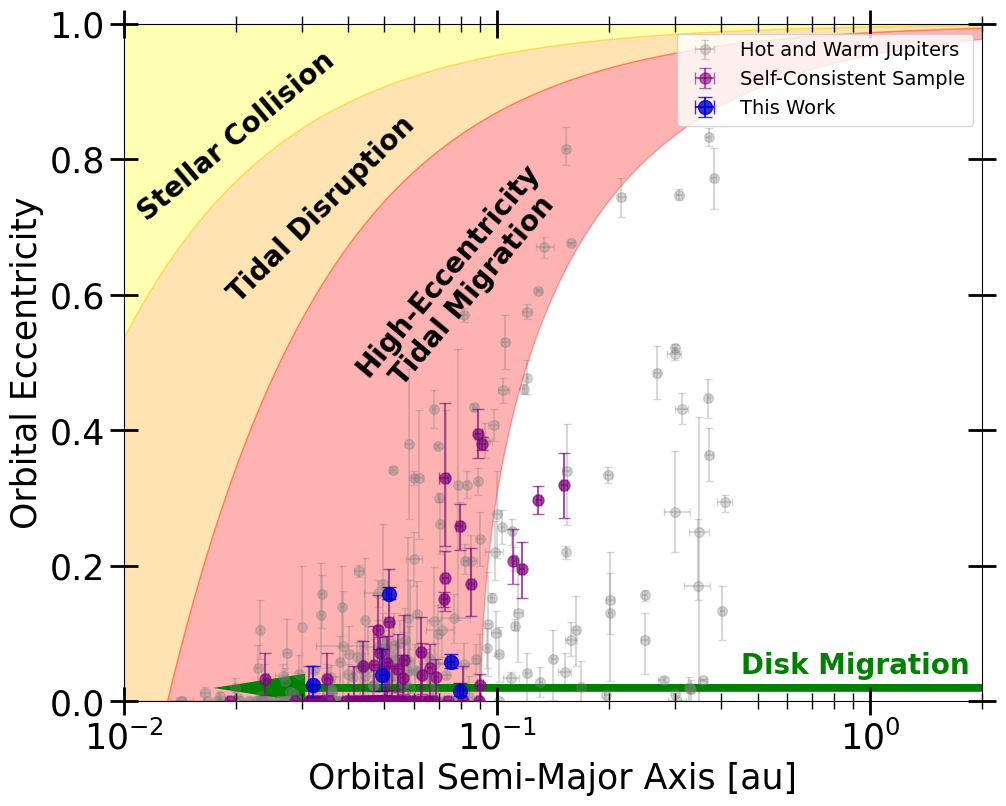

In [32]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# Background data
add_to_plot(archive_data, 7, 3, 1, 'grey', 'Hot and Warm Jupiters', alpha=0.3)

# Ikwut-Ukwa
add_to_plot(ikwut_ukwa_data, 8, 4, 9, 'purple', None, alpha=0.6)

# Rodriguez
add_to_plot(rodriguez_data, 8, 4, 9, 'purple', None, alpha=0.6)

# Rodriguez-Martinez
add_to_plot(rodriguez_martinez_data, 8, 4, 9, 'purple', None, alpha=0.6)

# Yee
add_to_plot(yee_data, 8, 4, 9, 'purple', None, alpha=0.6)

# MEEP 1
ax.errorbar(meep1_data.a_au, meep1_data.ecc, yerr = [meep1_data.ecc_errlow, meep1_data.ecc_errhigh], xerr = [meep1_data.a_errlow, meep1_data.a_errhigh], \
            marker = 'o', markersize=8, capsize=4, ls='None', c ='purple', zorder=9, alpha = 0.6, label='Self-Consistent Sample')

# Yee 2025
ax.errorbar(yee_2025_data.a_au, yee_2025_data.ecc, yerr = [yee_2025_data.ecc_errlow, yee_2025_data.ecc_errhigh], xerr = [yee_2025_data.a_errlow, yee_2025_data.a_errhigh], \
            marker = 'o', markersize=8, capsize=4, ls='None', c ='purple', zorder=9, alpha = 0.6)

# MEEP 2
ax.errorbar(meep2_data.a_au, meep2_data.ecc, yerr = [meep2_data.ecc_errlow, meep2_data.ecc_errhigh], xerr = [meep2_data.a_errlow, meep2_data.a_errhigh], \
            marker = 'o', markersize=10, capsize=5, ls='None', c ='mediumblue', zorder=10, alpha = 0.8, label='This Work')

ax.set_ylabel('Orbital Eccentricity', fontsize = 25)
ax.set_xlabel('Orbital Semi-Major Axis [au]', fontsize = 25)
ax.tick_params(which = 'both', direction = 'inout')
ax.tick_params(labelsize=25, length = 20, width=2)
ax.tick_params(which = 'minor', length = 12, width = 1)
ax.tick_params(which='both', top=True, right=True)

ax.fill_between(a, e_collision, 1, color='yellow', alpha=0.3, zorder=0)
ax.text(2e-2, 0.71, 'Stellar Collision', color='black', fontsize=20, weight='bold', horizontalalignment='center', rotation=40, zorder=0)

ax.fill_between(a, e_tidaldisrupt, e_collision, color='orange', alpha=0.3, zorder = 0)
ax.text(3.4e-2, 0.59, 'Tidal Disruption', color='black', fontsize=20, weight='bold', horizontalalignment='center', rotation=45, zorder=0)

ax.fill_between(a, e_HEM_10day, e_tidaldisrupt, color='red', alpha=0.3, zorder = 0)
ax.text(8e-2, 0.45, 'High-Eccentricity\nTidal Migration', color='black', fontsize=20, weight='bold', horizontalalignment='center', rotation=50)

# ax.fill_between(a, 0, e_scatter, color='grey', alpha=0.3, label='Planet-planet Scattering')
# ax.text(5e-1, 0.4, 'Planet-Planet\nScattering', color='black', fontsize=20, weight='bold', horizontalalignment='center', rotation=0, zorder=0)

ax.arrow(1.98, 0.02, -1.95, 0, color='green', head_width=0.03, head_length=0.01, linewidth=5)
ax.text(0.45, 0.04, 'Disk Migration', color='green', fontsize=20, weight='bold', zorder=0)

ax.legend(fontsize = 14, loc='upper right')

# Setting limits
ax.set_xscale('log')
ax.set_ylim(0, 1)
ax.set_xlim(0.01,2)

fig.tight_layout(pad=0.5)
fig.savefig('a_ecc.png', facecolor='white', transparent=False, dpi=300)

## Mass-Radius Plot

In [33]:
def add_to_plot(df, markersize, capsize, zorder, color, label, alpha=1):
    '''
    Adds data from the NEA to the M vs R plot.

    df: pandas dataframe containing data from the NEA
    markersize: matplotlib markersize (int)
    capsize: matplotlib capsize (int)
    zorder: matplotlib zorder (between 0 and 10)
    color: matplotlib color (str)
    label: matplotlib label (str)
    '''
    xerr = [df.pl_bmassjerr1, np.abs(df.pl_bmassjerr2)]
    yerr = [df.pl_radjerr1, np.abs(df.pl_radjerr2)]
    plt.errorbar(df.pl_bmassj, df.pl_radj, xerr=xerr, yerr=yerr, color=color, linestyle='None', marker='.', 
                 ms=markersize, label=label, alpha=alpha, zorder=zorder, capsize=capsize)

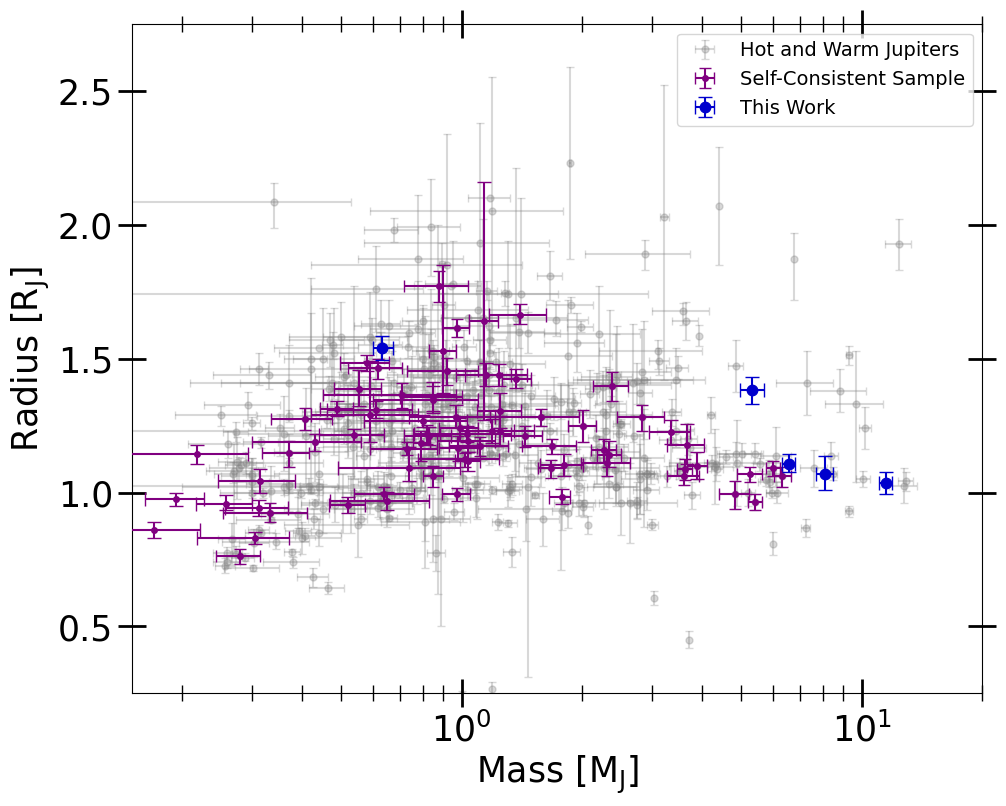

In [34]:
plt.figure(figsize=(10, 8))

# Remove systems with missing radius uncertainties (grazing transits)
yee_data = yee_data[yee_data.pl_radjerr1.notnull() & yee_data.pl_radjerr2.notnull()]

add_to_plot(archive_data, 10, 3, 1, 'grey', 'Hot and Warm Jupiters', alpha=0.3)
add_to_plot(ikwut_ukwa_data, 8, 4, 9, 'purple', 'Self-Consistent Sample')
add_to_plot(rodriguez_data, 8, 4, 9, 'purple', None)
add_to_plot(rodriguez_martinez_data, 8, 4, 9, 'purple', None)
add_to_plot(yee_data, 8, 4, 9, 'purple', None)

# MEEP 1
xerr_2 = [meep1_data.mass_errlow, meep1_data.mass_errhigh]
yerr_2 = [meep1_data.radius_errlow, meep1_data.radius_errhigh]
plt.errorbar(meep1_data.mass, meep1_data.radius, color='purple', xerr=xerr_2, yerr=yerr_2, linestyle='None', marker='.', ms=8, zorder=9, capsize=5)

# Yee 2025
xerr_3 = [yee_2025_data.mass_errlow, yee_2025_data.mass_errhigh]
yerr_3 = [yee_2025_data.radius_errlow, yee_2025_data.radius_errhigh]
plt.errorbar(yee_2025_data.mass, yee_2025_data.radius, color='purple', xerr=xerr_3, yerr=yerr_3, linestyle='None', marker='.', ms=8, zorder=9, capsize=5)

# MEEP 2
xerr_3 = [meep2_data.mass_errlow, meep2_data.mass_errhigh]
yerr_3 = [meep2_data.radius_errlow, meep2_data.radius_errhigh]
plt.errorbar(meep2_data.mass, meep2_data.radius, color='mediumblue', xerr=xerr_3, yerr=yerr_3, linestyle='None', marker='.', ms=15, zorder=10, capsize=5, label='This Work')

plt.xscale('log')
plt.legend(fontsize=14)
plt.xlabel(r'Mass [M$_\text{J}$]', fontsize=25)
plt.ylabel(r'Radius [R$_\text{J}$]', fontsize=25)
plt.xlim(0.15, 20)
plt.ylim(0.25, 2.75)
plt.tick_params(which = 'both', direction = 'inout')
plt.tick_params(labelsize=25, length = 20, width=2)
plt.tick_params(which = 'minor', length = 12, width = 1)
plt.tick_params(which='both', top=True, right=True)
plt.tight_layout(pad=0.5)
plt.savefig('m_r.png', facecolor='white', transparent=False, dpi=300)

## Eccentricity vs. Teff Plot

In [13]:
def add_to_plot(df, markersize, capsize, zorder, color, label, alpha=1):
    '''
    Adds data from the NEA to the M vs R plot.

    df: pandas dataframe containing data from the NEA
    markersize: matplotlib markersize (int)
    capsize: matplotlib capsize (int)
    zorder: matplotlib zorder (between 0 and 10)
    color: matplotlib color (str)
    label: matplotlib label (str)
    '''
    xerr = [df.st_tefferr1, np.abs(df.st_tefferr2)]
    yerr = [df.pl_orbeccenerr1, np.abs(df.pl_orbeccenerr2)]
    plt.errorbar(df.st_teff, df.pl_orbeccen, xerr=xerr, yerr=yerr, color=color, linestyle='None', marker='.', 
                 ms=markersize, label=label, alpha=alpha, zorder=zorder, capsize=capsize)

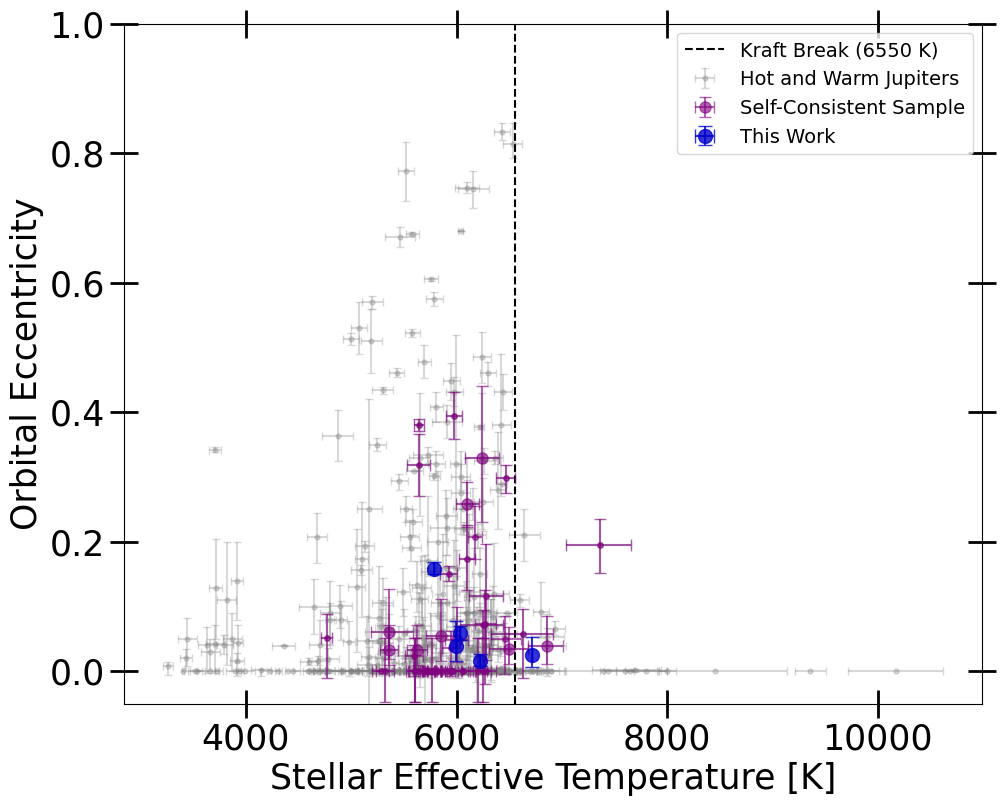

In [14]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# Background data
add_to_plot(archive_data, 7, 3, 1, 'grey', 'Hot and Warm Jupiters', alpha=0.3)

# Ikwut-Ukwa
add_to_plot(ikwut_ukwa_data, 8, 4, 9, 'purple', None, alpha=0.6)

# Rodriguez
add_to_plot(rodriguez_data, 8, 4, 9, 'purple', None, alpha=0.6)

# Rodriguez-Martinez
add_to_plot(rodriguez_martinez_data, 8, 4, 9, 'purple', None, alpha=0.6)

# Yee
add_to_plot(yee_data, 8, 4, 9, 'purple', None, alpha=0.6)

# MEEP 1
ax.errorbar(meep1_data.teff, meep1_data.ecc, yerr = [meep1_data.ecc_errlow, meep1_data.ecc_errhigh], xerr = [meep1_data.teff_errlow, meep1_data.teff_errhigh], \
            marker = 'o', markersize=8, capsize=4, ls='None', c ='purple', zorder=9, alpha = 0.6, label='Self-Consistent Sample')

# MEEP 2
ax.errorbar(meep2_data.teff, meep2_data.ecc, yerr = [meep2_data.ecc_errlow, meep2_data.ecc_errhigh], xerr = [meep2_data.a_errlow, meep2_data.a_errhigh], \
            marker = 'o', markersize=10, capsize=5, ls='None', c ='mediumblue', zorder=10, alpha = 0.8, label='This Work')

ax.axvline(6550, linestyle='--', color='k', label = 'Kraft Break (6550 K)')

ax.set_ylabel('Orbital Eccentricity', fontsize = 25)
ax.set_xlabel('Stellar Effective Temperature [K]', fontsize = 25)
ax.tick_params(which = 'both', direction = 'inout')
ax.tick_params(labelsize=25, length = 20, width=2)
ax.tick_params(which = 'minor', length = 12, width = 1)
ax.tick_params(which='both', top=True, right=True)

ax.legend(fontsize = 14, loc='upper right')

# Setting limits
# ax.set_xscale('log')
ax.set_ylim(-0.05, 1)
# ax.set_xlim(0.01,2)

fig.tight_layout(pad=0.5)
fig.savefig('teff_ecc.png', facecolor='white', transparent=False, dpi=300)

## Mass vs. Period Plot

In [13]:
def add_to_plot(df, markersize, capsize, zorder, color, label, alpha=1):
    '''
    Adds data from the NEA to the M vs P plot.

    df: pandas dataframe containing data from the NEA
    markersize: matplotlib markersize (int)
    capsize: matplotlib capsize (int)
    zorder: matplotlib zorder (between 0 and 10)
    color: matplotlib color (str)
    label: matplotlib label (str)
    '''
    xerr = [df.pl_orbpererr1, np.abs(df.pl_orbpererr2)]
    yerr = [df.pl_bmassjerr1, np.abs(df.pl_bmassjerr2)]
    plt.errorbar(df.pl_orbper, df.pl_bmassj, xerr=xerr, yerr=yerr, color=color, linestyle='None', marker='.', 
                 ms=markersize, label=label, alpha=alpha, zorder=zorder, capsize=capsize)

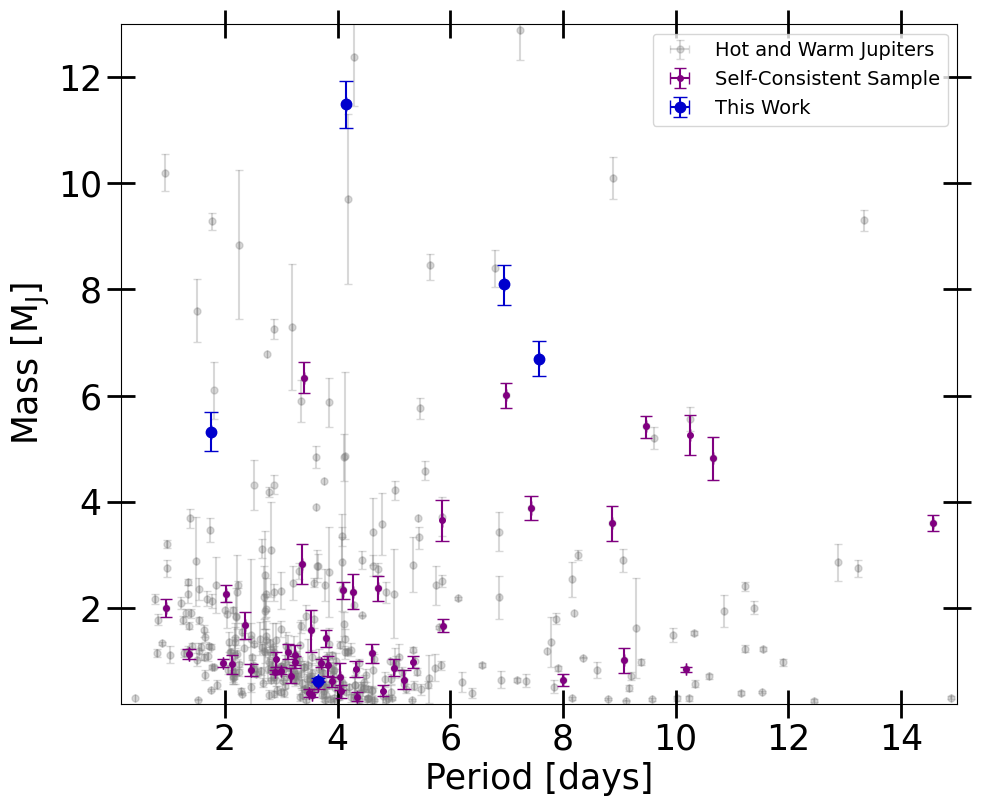

In [24]:
plt.figure(figsize=(10, 8))

add_to_plot(archive_data, 10, 3, 1, 'grey', 'Hot and Warm Jupiters', alpha=0.3)
add_to_plot(ikwut_ukwa_data, 8, 4, 9, 'purple', 'Self-Consistent Sample')
add_to_plot(rodriguez_data, 8, 4, 9, 'purple', None)
add_to_plot(rodriguez_martinez_data, 8, 4, 9, 'purple', None)
add_to_plot(yee_data, 8, 4, 9, 'purple', None)

xerr_2 = [meep1_data.period_errlow, meep1_data.period_errhigh]
yerr_2 = [meep1_data.mass_errlow, meep1_data.mass_errhigh]
plt.errorbar(meep1_data.period, meep1_data.mass, color='purple', xerr=xerr_2, yerr=yerr_2, linestyle='None', marker='.', ms=8, zorder=9, capsize=5)

xerr_3 = [meep2_data.period_errlow, meep2_data.period_errhigh]
yerr_3 = [meep2_data.mass_errlow, meep2_data.mass_errhigh]
plt.errorbar(meep2_data.period, meep2_data.mass, color='mediumblue', xerr=xerr_3, yerr=yerr_3, linestyle='None', marker='.', ms=15, zorder=10, capsize=5, label='This Work')

# plt.yscale('log')
plt.legend(fontsize=14, loc='upper right')
plt.xlabel(r'Period [days]', fontsize=25)
plt.ylabel(r'Mass [M$_\text{J}$]', fontsize=25)
plt.xlim(0.15, 15)
plt.ylim(0.2, 13)
plt.tick_params(which = 'both', direction = 'inout')
plt.tick_params(labelsize=25, length = 20, width=2)
plt.tick_params(which = 'minor', length = 12, width = 1)
plt.tick_params(which='both', top=True, right=True)
plt.tight_layout(pad=0.5)
plt.savefig('p_m.png', facecolor='white', transparent=False, dpi=300)